In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os
import matplotlib.colors as mcolors

def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

# not done yet

In [2]:
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'

population_path = f'{h08dir}/wsi/dat/population/population_threshold_world.npy'
population = np.load(population_path)

availability_path = f'{h08dir}/wsi/dat/availablewater/availablewater_threshold_world.npy'
availability = np.load(availability_path)

lonlat_path = f'{h08dir}/wsi/dat/population/population_m3cy_citylonlat.npy'
citylonlat = np.load(lonlat_path)

grid_path = f'{h08dir}/wsi/dat/population/population_m3cy_citygrid.npy'
citygrid = np.load(grid_path)
citygrid_masked = np.ma.masked_where(citygrid==0, citygrid)

In [7]:
#lonlat [city_num, cnt_lon, cnt_lat, cmy, un_pop, city_name, country, region]
#population [2160, 4320] person
#availability [2160, 4320] m3year-1

In [3]:
print(availability.shape)
maxxx = np.max(availability)
minnn = np.min(availability)
print(maxxx, minnn) #2.985 trillion m3 year-1
# McDonal 2014 
# Million Litre per Day = MLD
# city under 100MLD = 36.5 Million m3 year-1
# city under 1000MLD = 365 million m3 year-1
# city under 10,000MLD = 3,650 million m3 year-1

(2160, 4320)
2895821960832.0 0.0


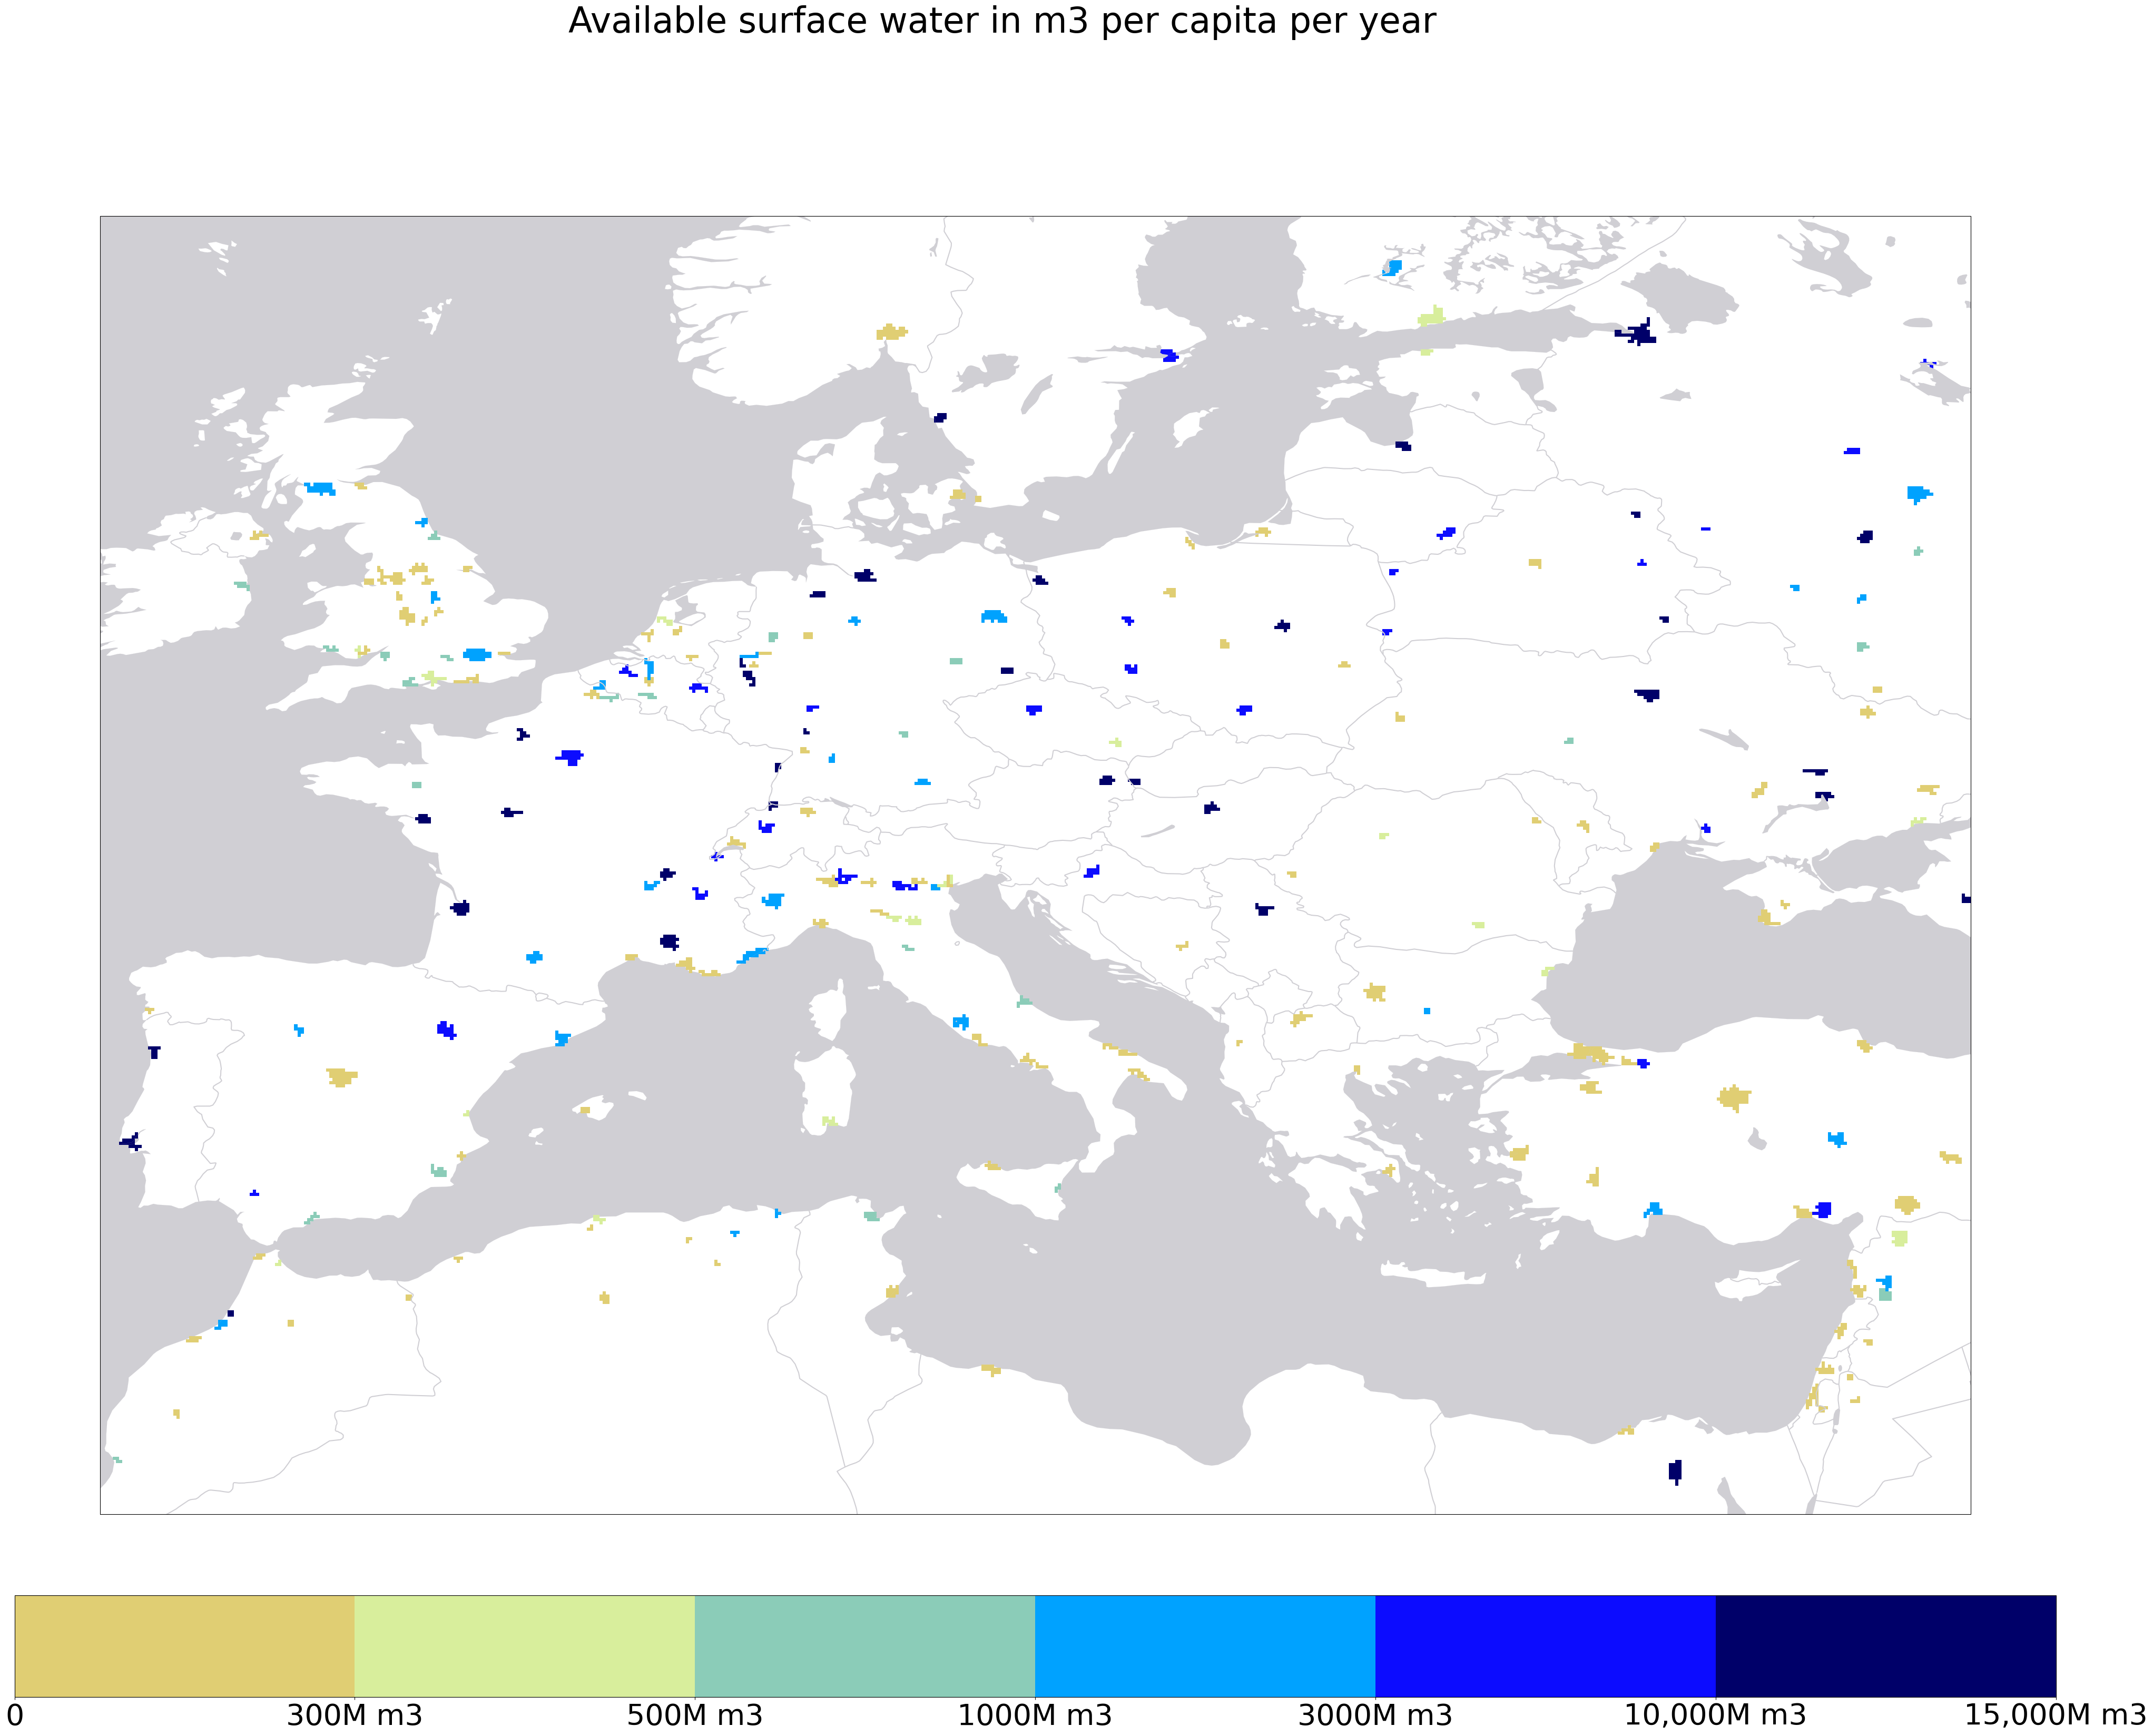

In [33]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-10, 39, 29, 63)
ava_cropped = availability[upperindex:lowerindex, leftindex:rightindex]
ava_masked = np.ma.masked_where(ava_cropped == 0, ava_cropped)

bounds = [0, 36.5*1e6, 365*1e6, 3650*1e6]
labels = ['0', '100MLD', '1,000MLD', '10,000MLD']
colors = ['#e0ce73', '#9ecbea', '#0082ae']

bounds = [0, 0.3*1e9, 0.5*1e9, 1*1e9, 3*1e9, 10*1e9, 15*1e9]
labels = ['0', '300M m3', '500M m3', '1000M m3', '3000M m3', '10,000M m3', '15,000M m3']
colors = ['#e0ce73', '#d8ee9c', '#8bccb8', '#00a2ff', '#0c0cff', '#000069']

cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 40
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
im = ax.imshow(ava_masked,
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.LAKES, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_ticks(bounds)
cbar.set_ticklabels(labels)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()

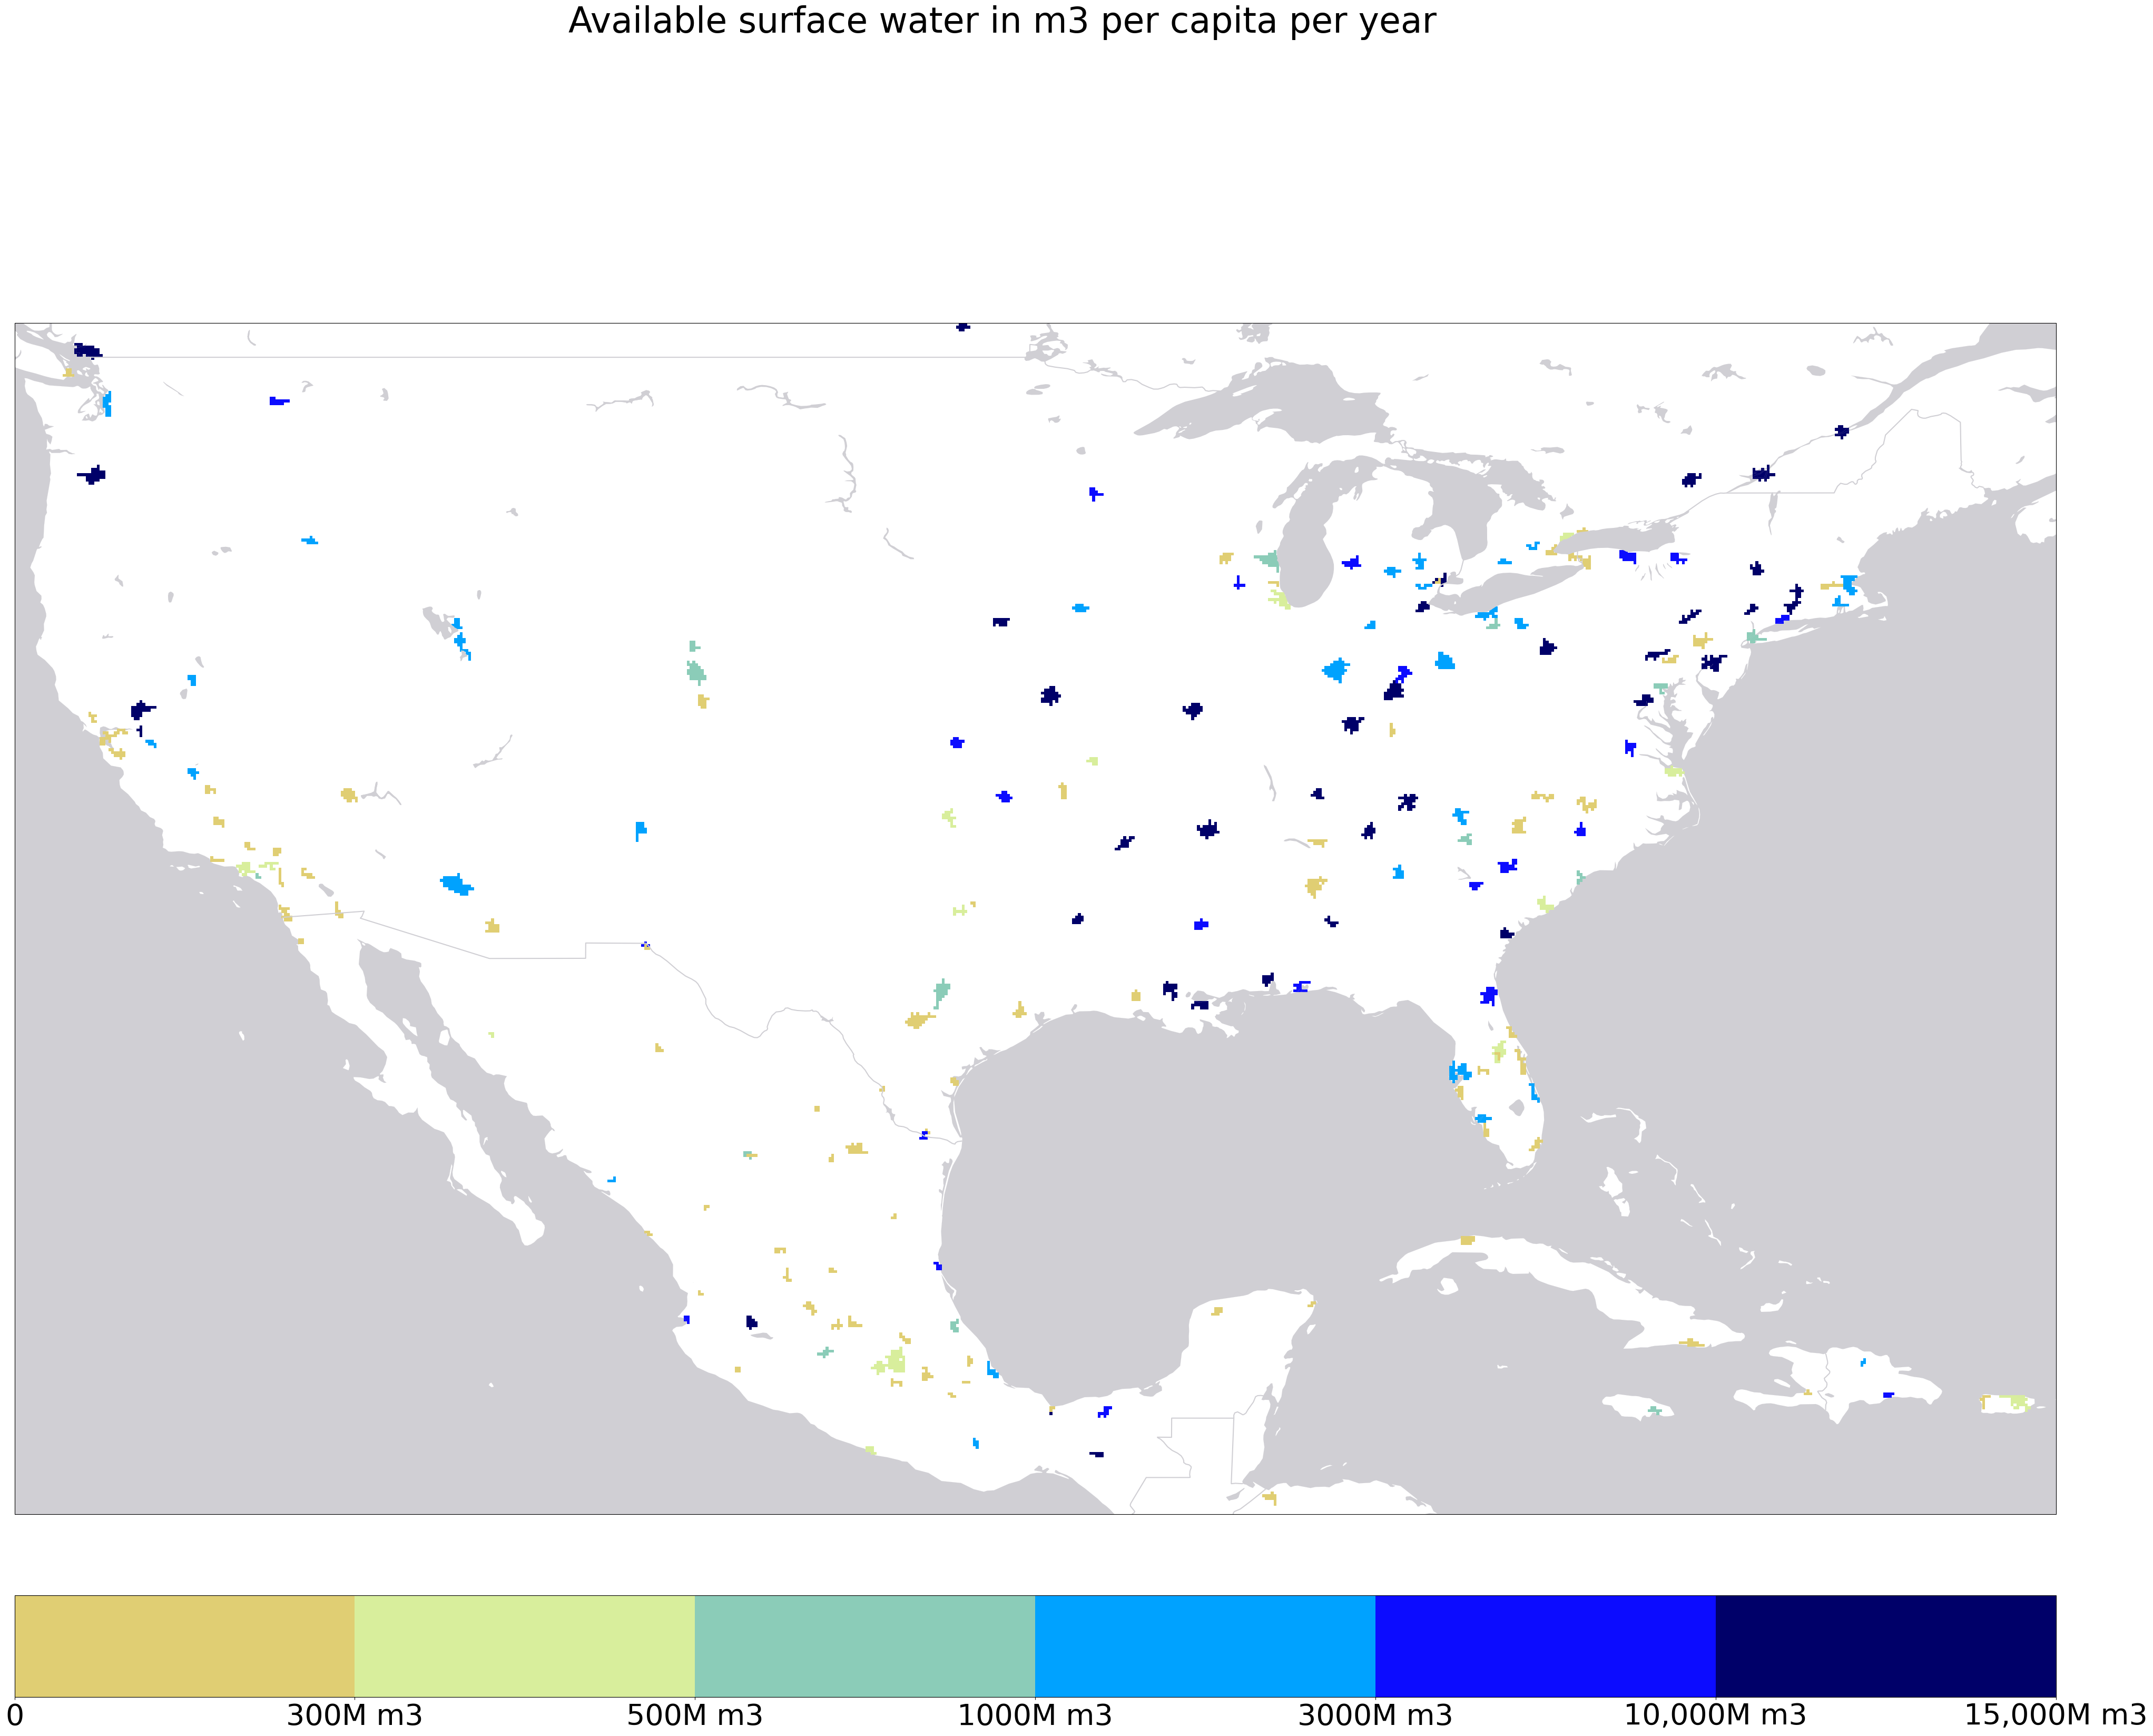

In [34]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-125, -65, 15, 50)
ava_cropped = availability[upperindex:lowerindex, leftindex:rightindex]
ava_masked = np.ma.masked_where(ava_cropped == 0, ava_cropped)

bounds = [0, 36.5*1e6, 365*1e6, 3650*1e6]
labels = ['0', '100MLD', '1,000MLD', '10,000MLD']
colors = ['#e0ce73', '#9ecbea', '#0082ae']

bounds = [0, 0.3*1e9, 0.5*1e9, 1*1e9, 3*1e9, 10*1e9, 15*1e9]
labels = ['0', '300M m3', '500M m3', '1000M m3', '3000M m3', '10,000M m3', '15,000M m3']
colors = ['#e0ce73', '#d8ee9c', '#8bccb8', '#00a2ff', '#0c0cff', '#000069']

cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 40
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
im = ax.imshow(ava_masked,
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.LAKES, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_ticks(bounds)
cbar.set_ticklabels(labels)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()

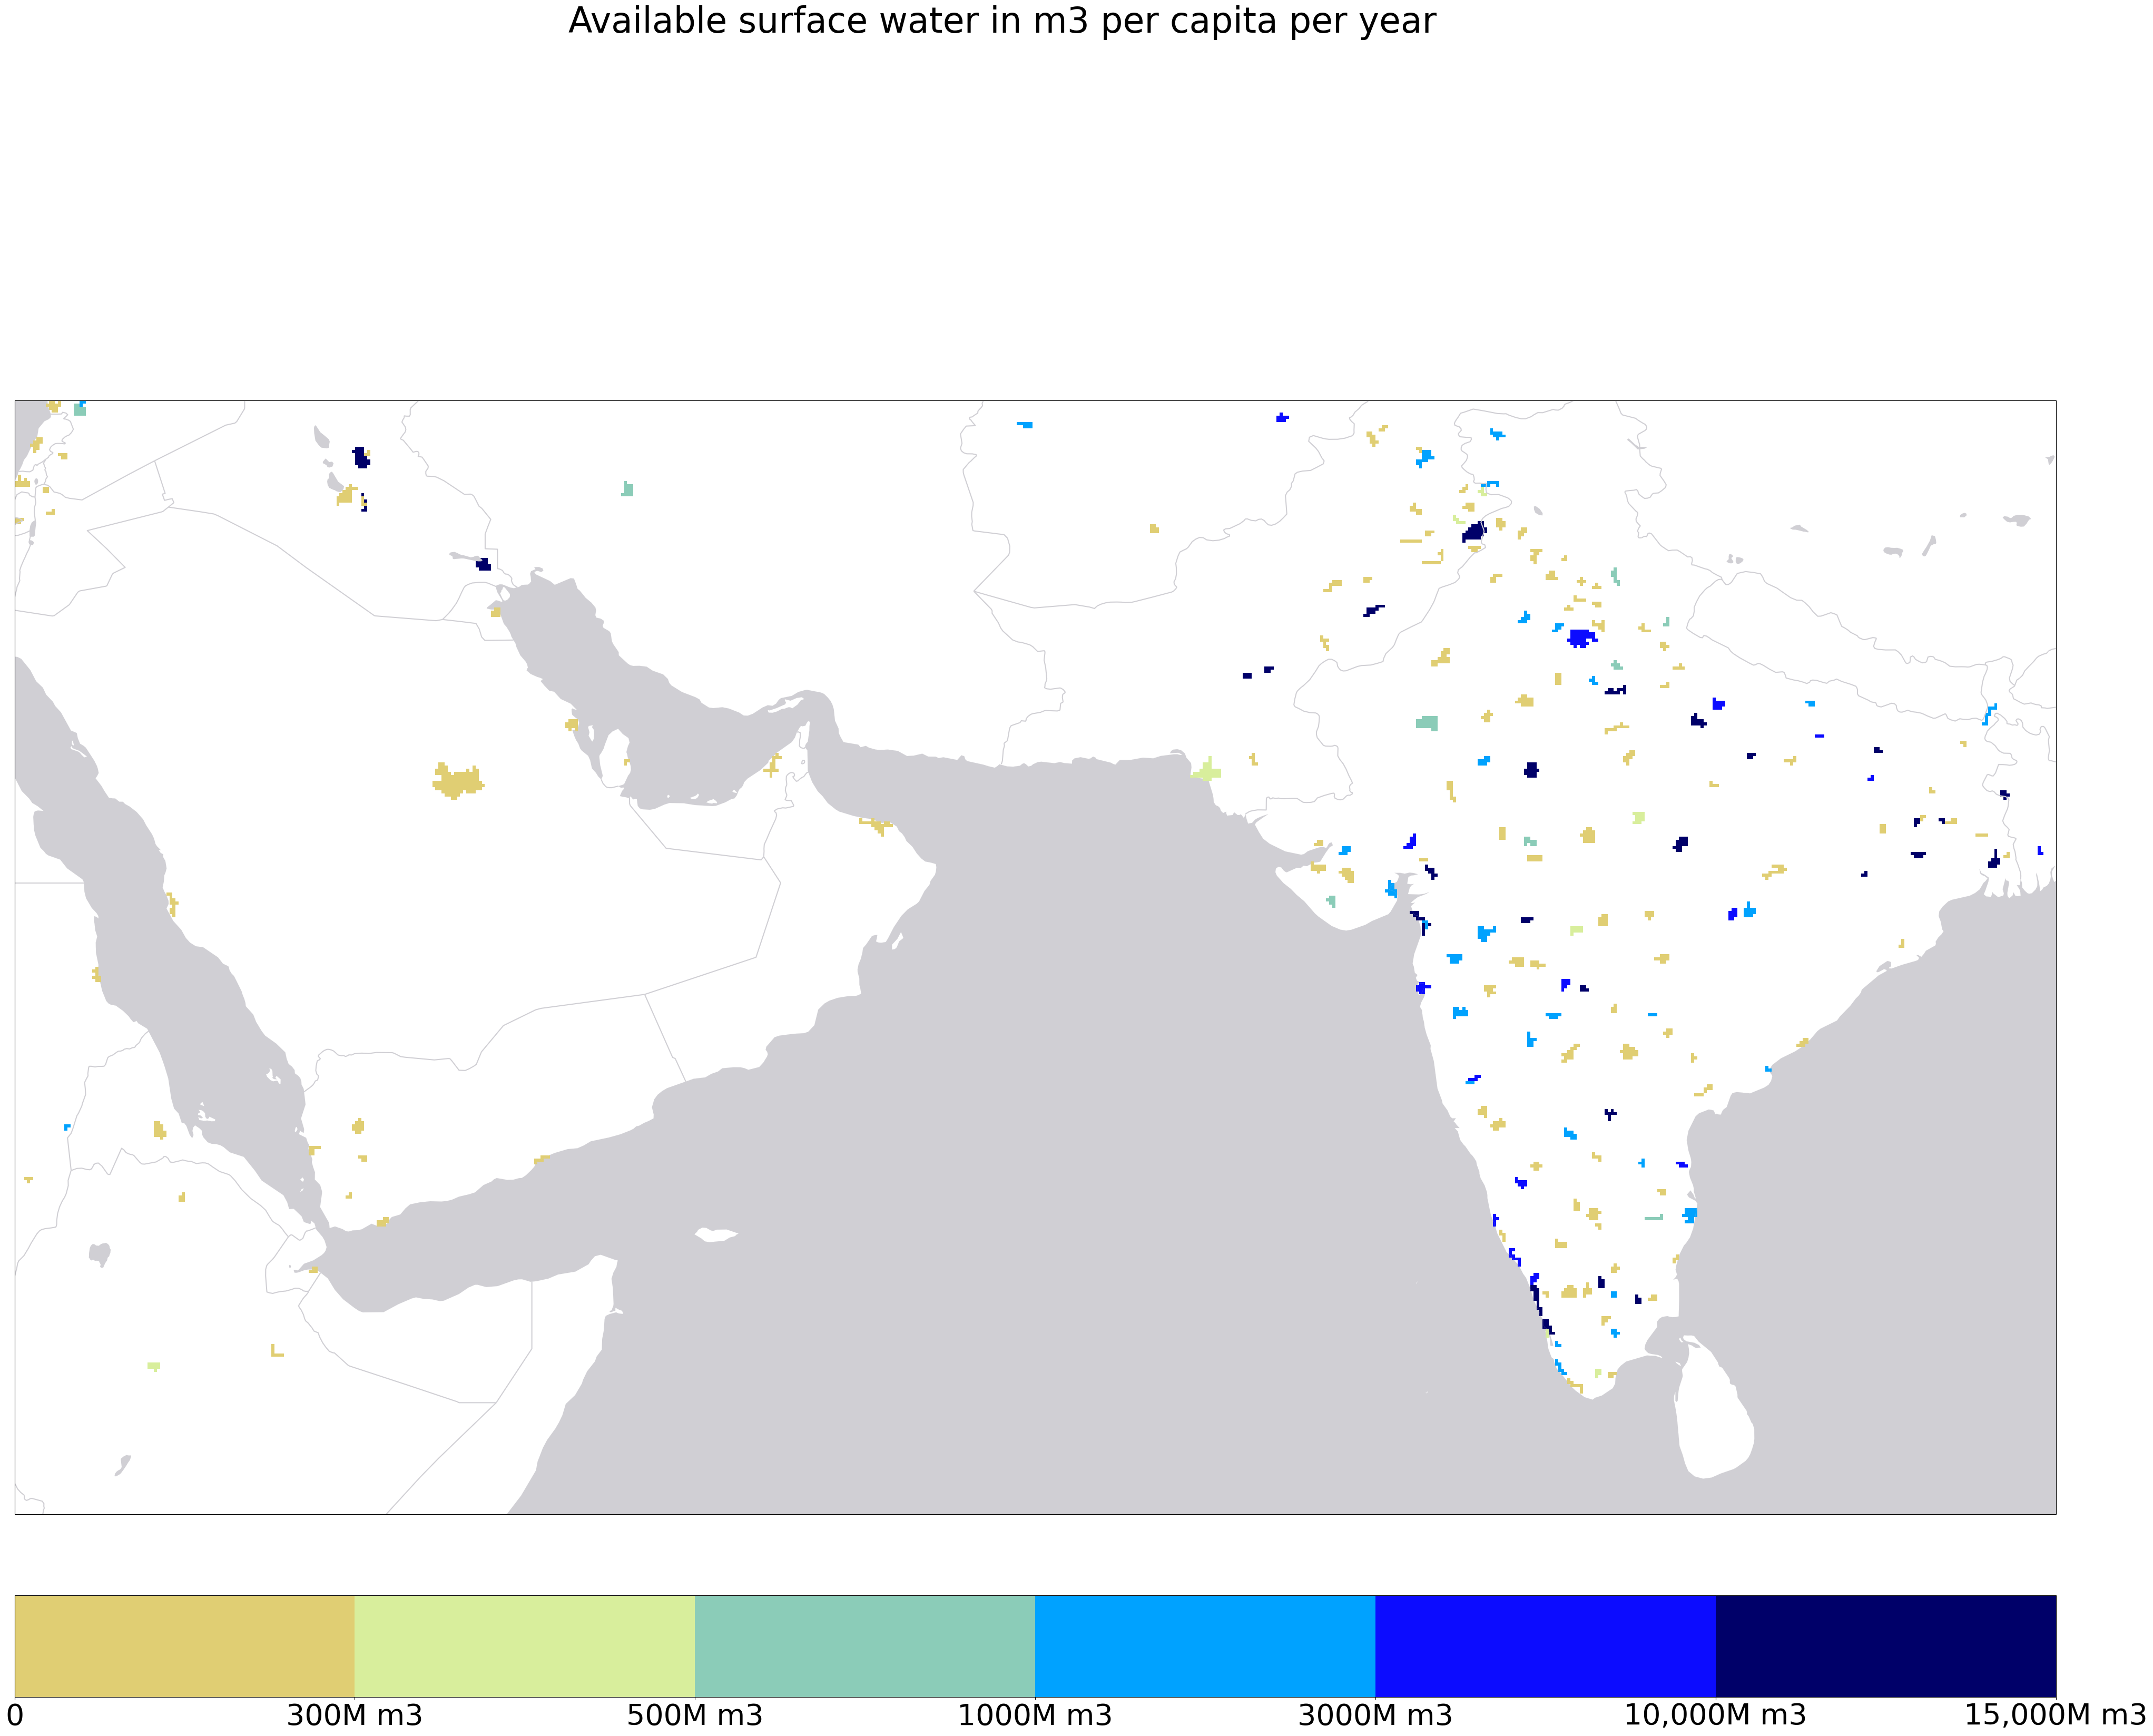

In [35]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(35, 90, 5, 35)
ava_cropped = availability[upperindex:lowerindex, leftindex:rightindex]
ava_masked = np.ma.masked_where(ava_cropped == 0, ava_cropped)

bounds = [0, 36.5*1e6, 365*1e6, 3650*1e6]
labels = ['0', '100MLD', '1,000MLD', '10,000MLD']
colors = ['#e0ce73', '#9ecbea', '#0082ae']

bounds = [0, 0.3*1e9, 0.5*1e9, 1*1e9, 3*1e9, 10*1e9, 15*1e9]
labels = ['0', '300M m3', '500M m3', '1000M m3', '3000M m3', '10,000M m3', '15,000M m3']
colors = ['#e0ce73', '#d8ee9c', '#8bccb8', '#00a2ff', '#0c0cff', '#000069']

cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 40
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
im = ax.imshow(ava_masked,
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.LAKES, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_ticks(bounds)
cbar.set_ticklabels(labels)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()


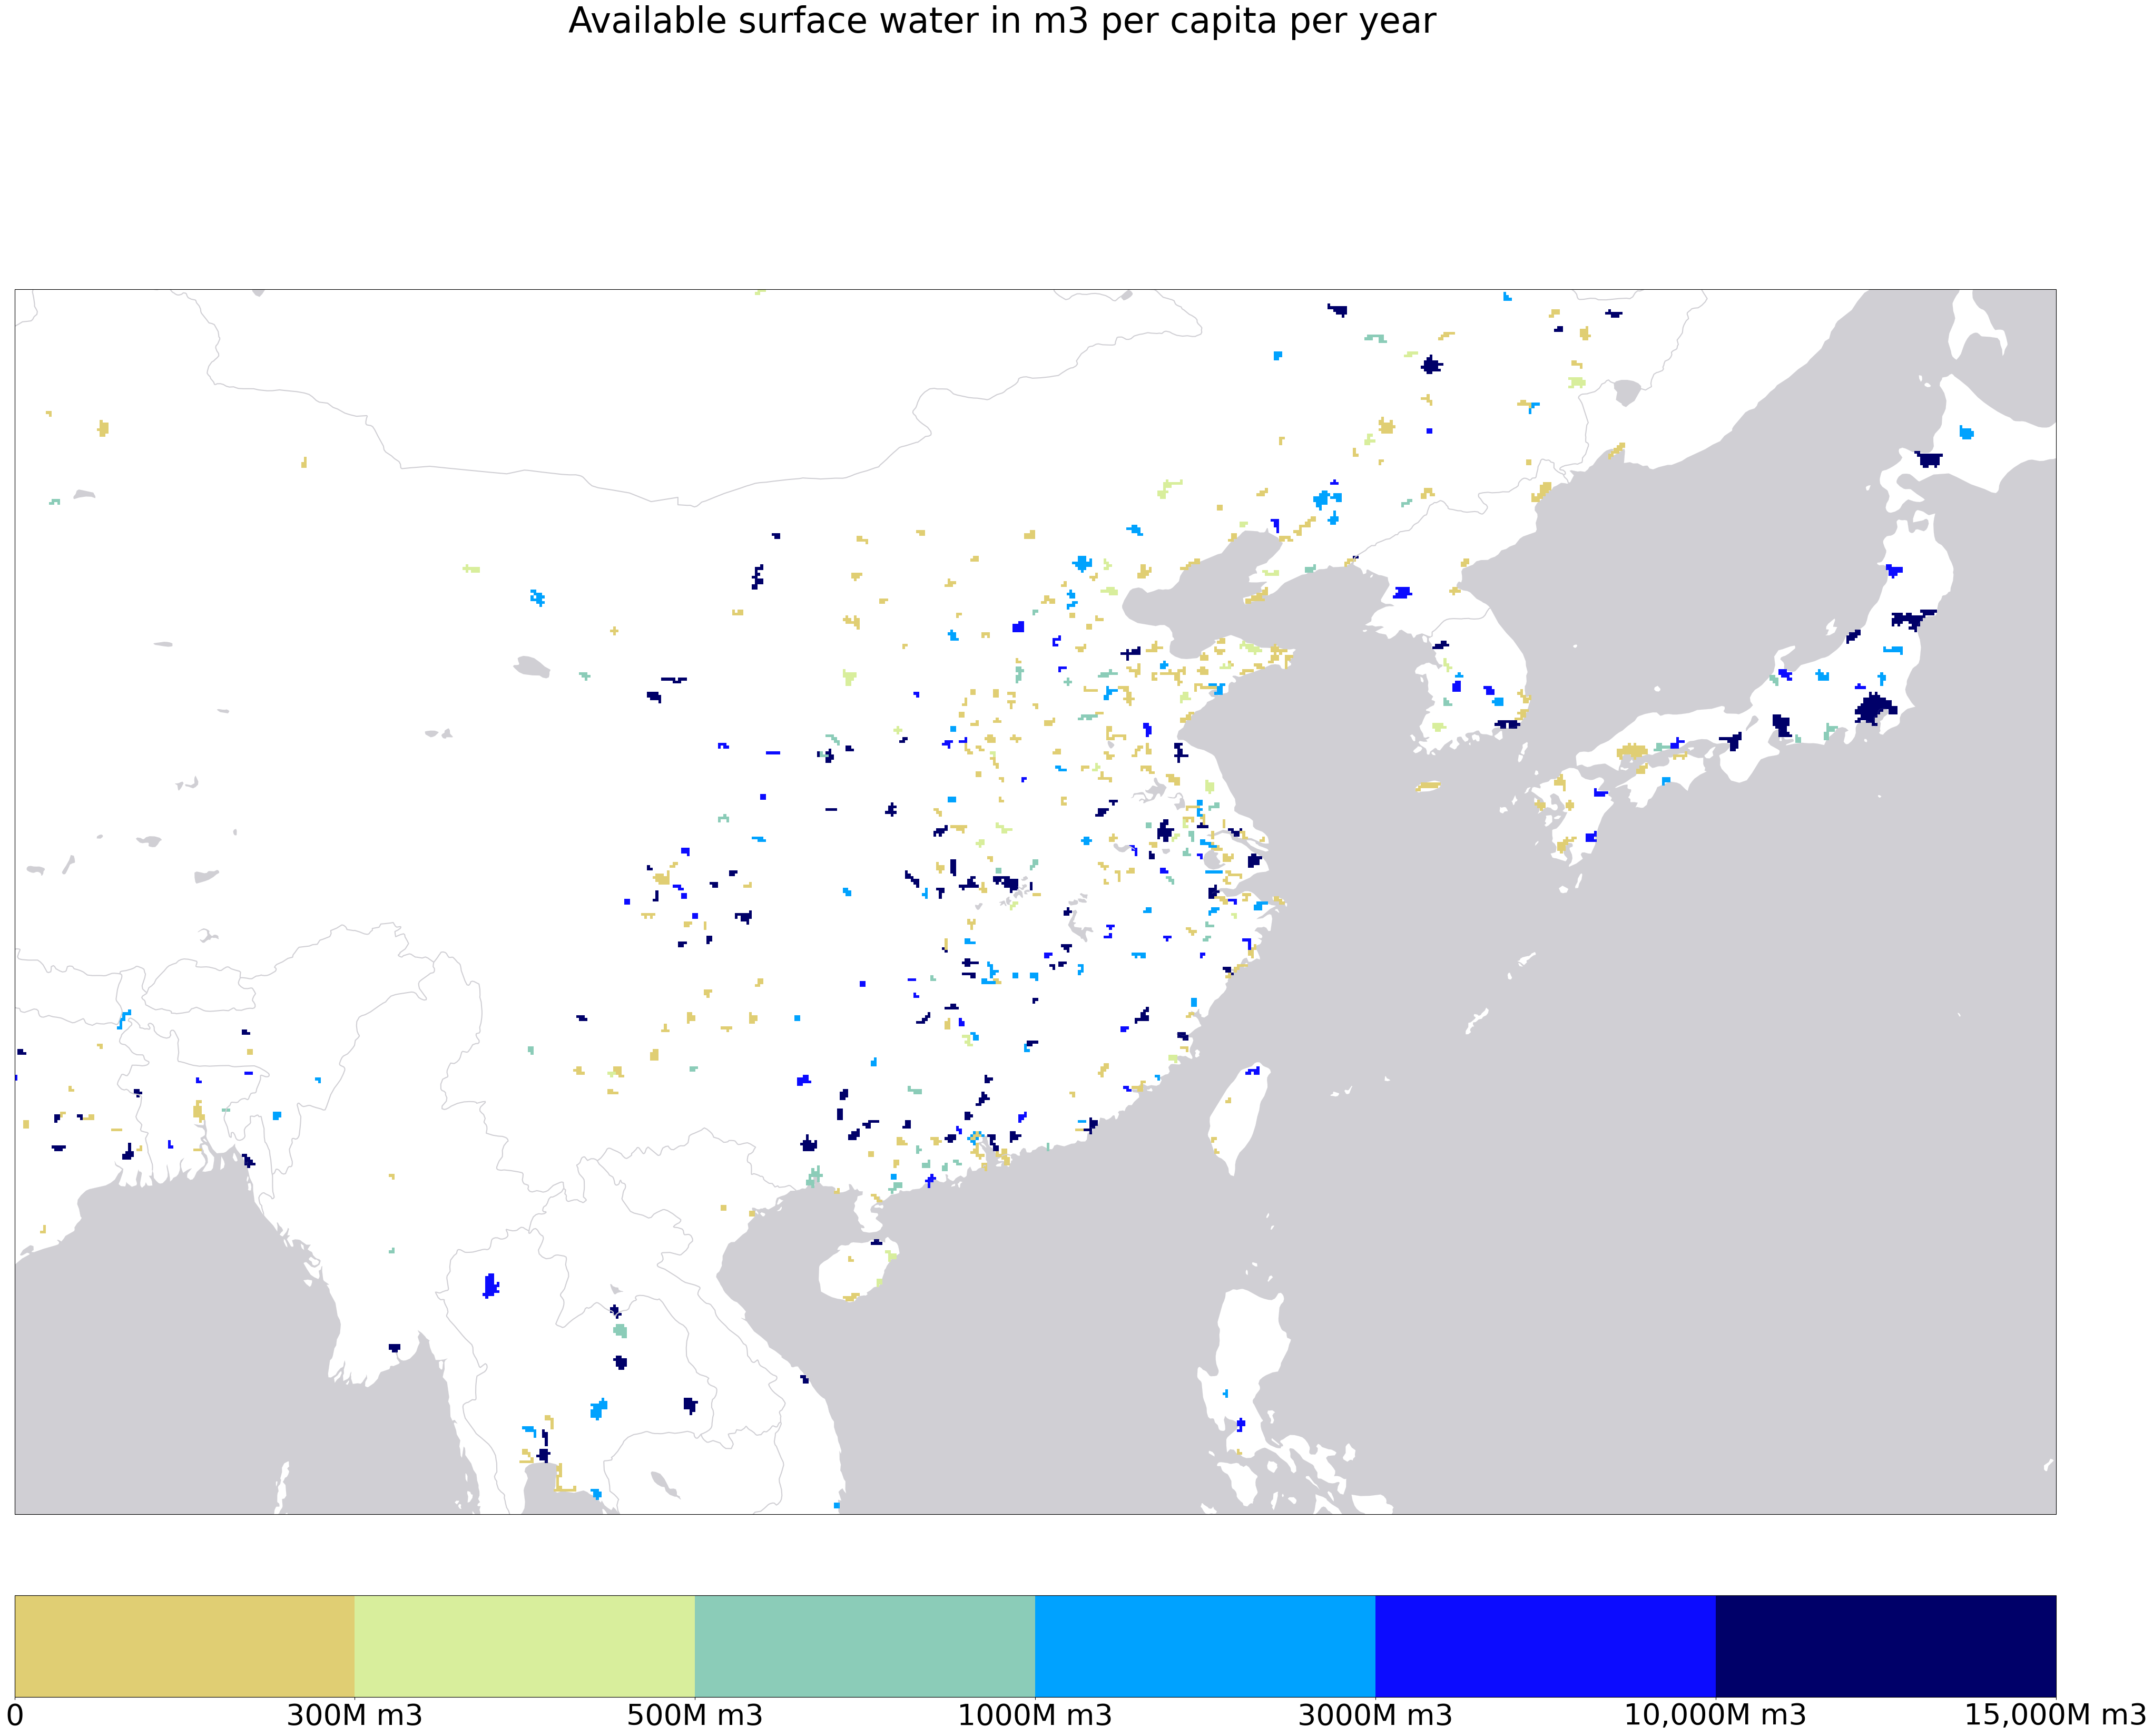

In [36]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(85, 145, 12, 48)
ava_cropped = availability[upperindex:lowerindex, leftindex:rightindex]
ava_masked = np.ma.masked_where(ava_cropped == 0, ava_cropped)

bounds = [0, 36.5*1e6, 365*1e6, 3650*1e6]
labels = ['0', '100MLD', '1,000MLD', '10,000MLD']
colors = ['#e0ce73', '#9ecbea', '#0082ae']

bounds = [0, 0.3*1e9, 0.5*1e9, 1*1e9, 3*1e9, 10*1e9, 15*1e9]
labels = ['0', '300M m3', '500M m3', '1000M m3', '3000M m3', '10,000M m3', '15,000M m3']
colors = ['#e0ce73', '#d8ee9c', '#8bccb8', '#00a2ff', '#0c0cff', '#000069']

cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 40
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
im = ax.imshow(ava_masked,
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.LAKES, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_ticks(bounds)
cbar.set_ticklabels(labels)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()


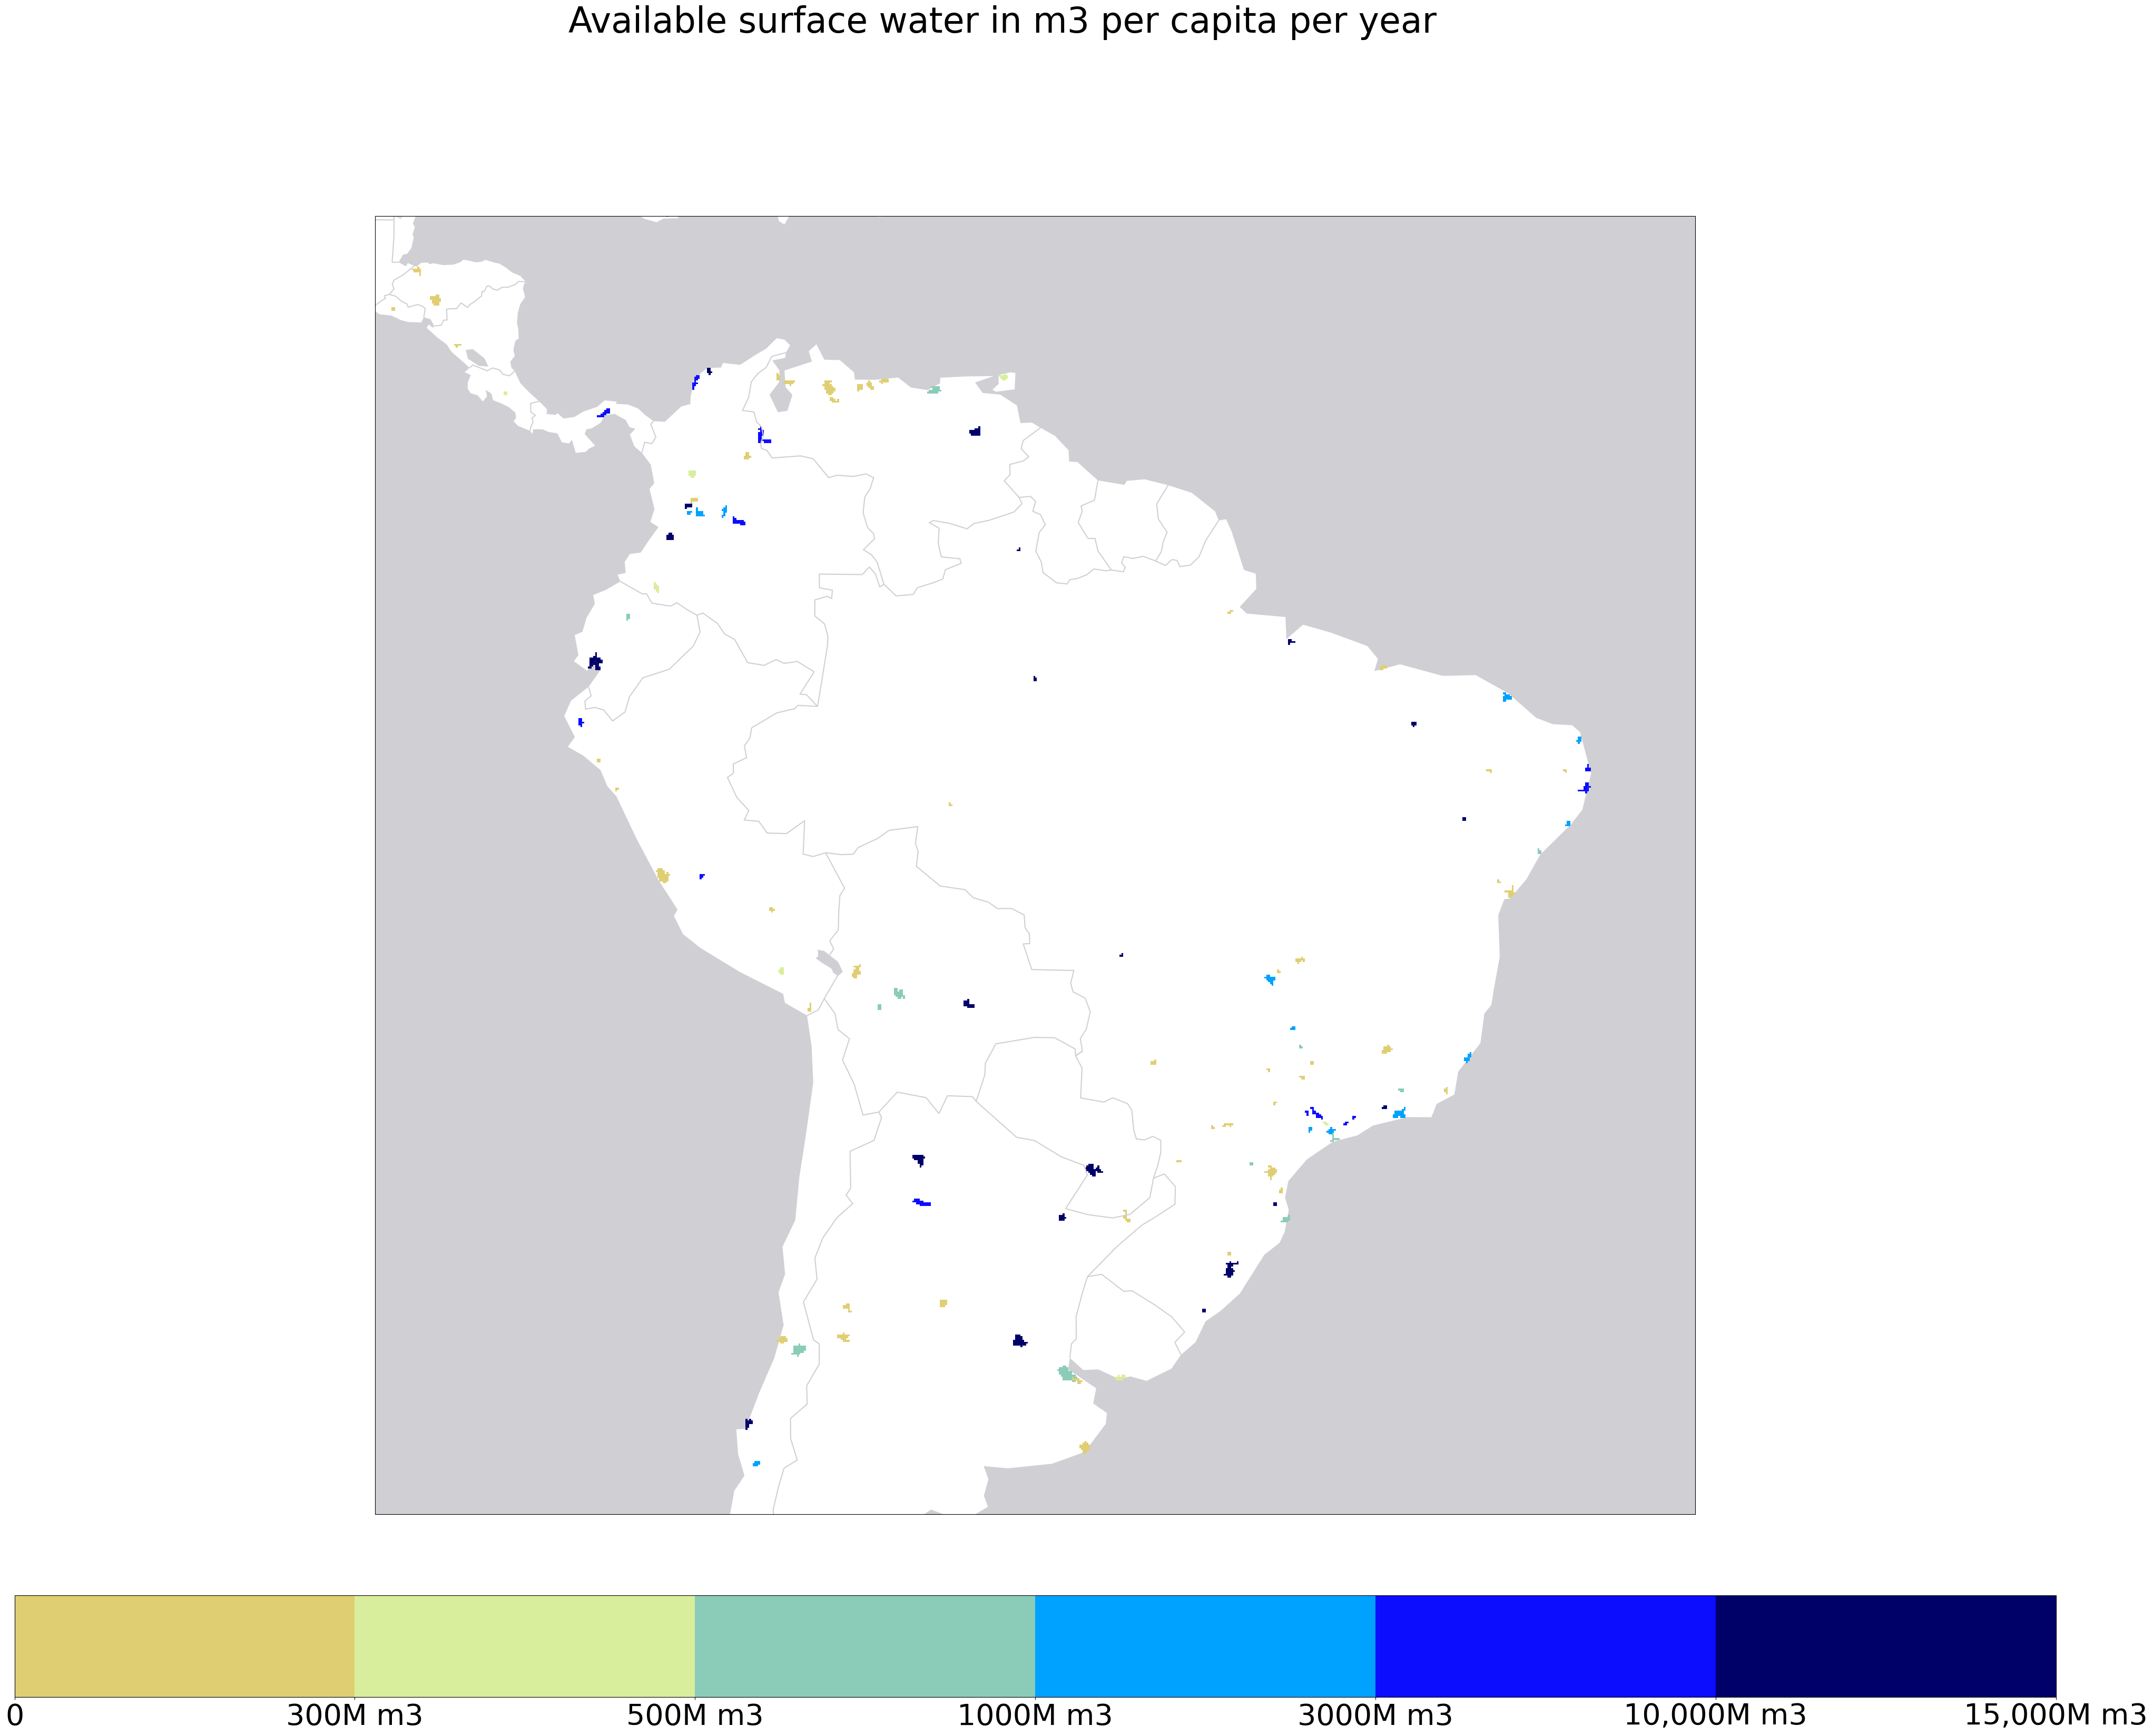

In [37]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-90, -30, -41, 18)
ava_cropped = availability[upperindex:lowerindex, leftindex:rightindex]
ava_masked = np.ma.masked_where(ava_cropped == 0, ava_cropped)

bounds = [0, 36.5*1e6, 365*1e6, 3650*1e6]
labels = ['0', '100MLD', '1,000MLD', '10,000MLD']
colors = ['#e0ce73', '#9ecbea', '#0082ae']

bounds = [0, 0.3*1e9, 0.5*1e9, 1*1e9, 3*1e9, 10*1e9, 15*1e9]
labels = ['0', '300M m3', '500M m3', '1000M m3', '3000M m3', '10,000M m3', '15,000M m3']
colors = ['#e0ce73', '#d8ee9c', '#8bccb8', '#00a2ff', '#0c0cff', '#000069']

cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 40
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
im = ax.imshow(ava_masked,
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.LAKES, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_ticks(bounds)
cbar.set_ticklabels(labels)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()


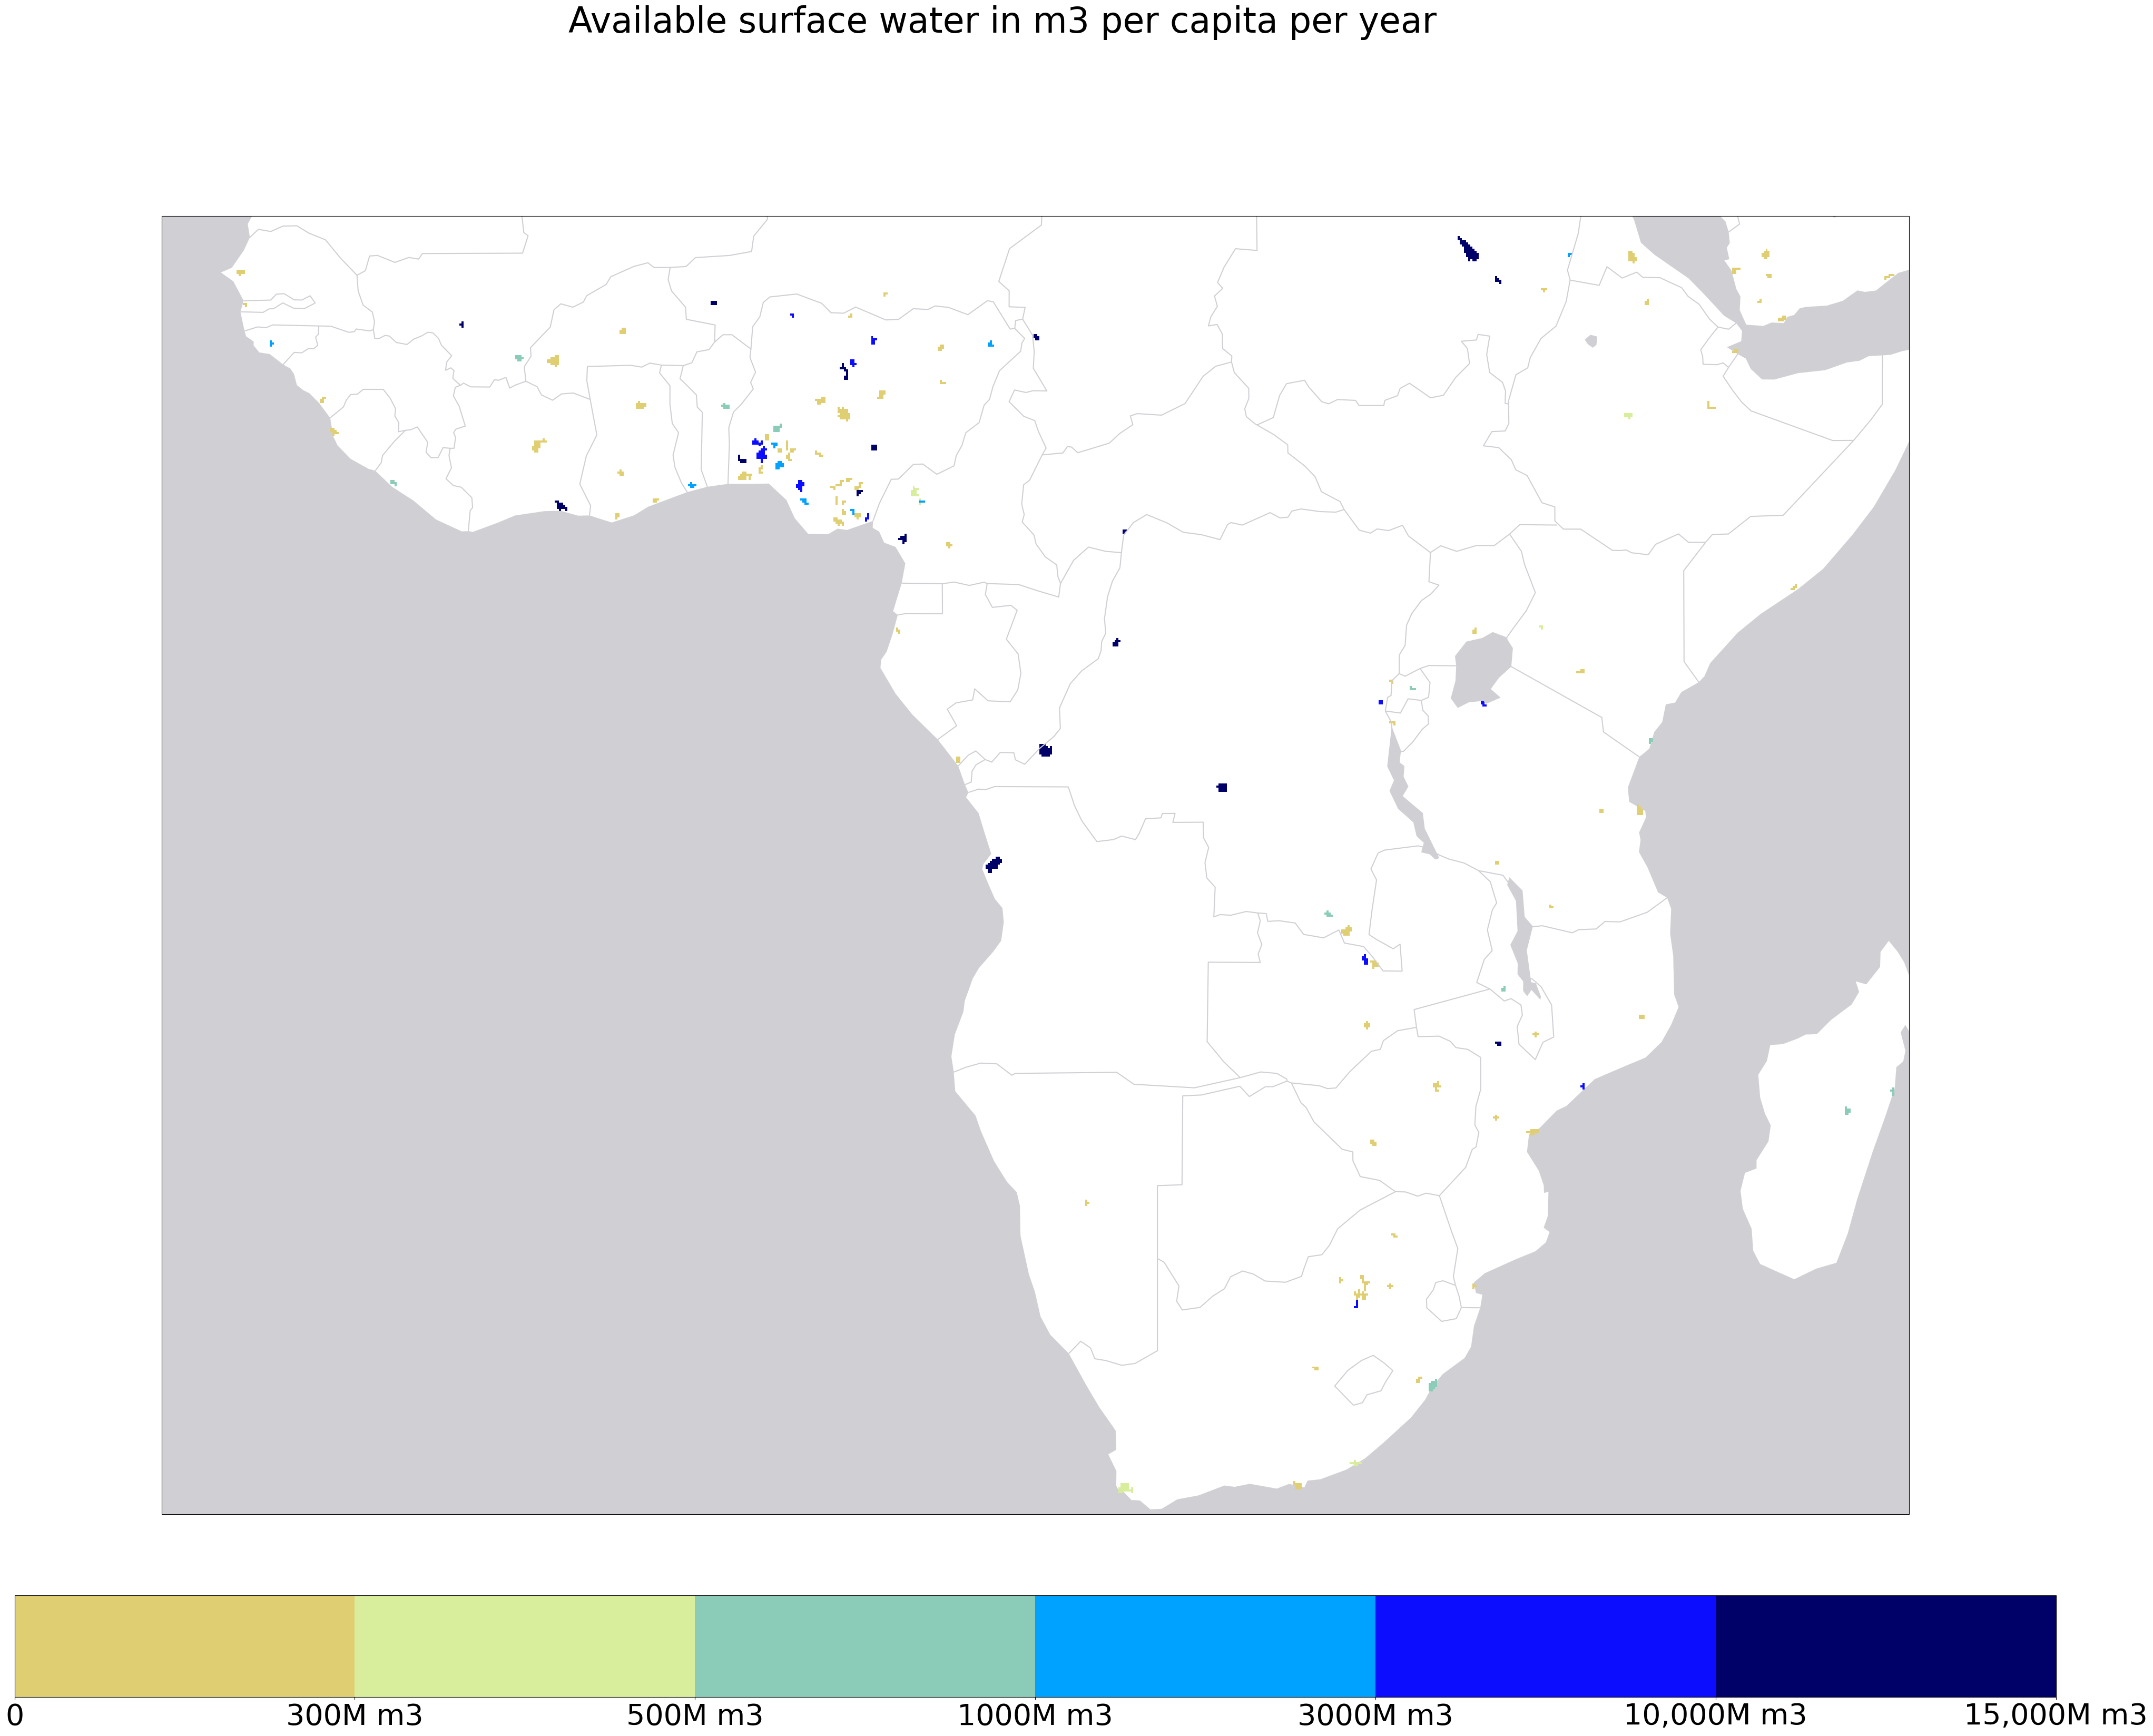

In [38]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-20, 50, -35, 17)
ava_cropped = availability[upperindex:lowerindex, leftindex:rightindex]
ava_masked = np.ma.masked_where(ava_cropped == 0, ava_cropped)

bounds = [0, 36.5*1e6, 365*1e6, 3650*1e6]
labels = ['0', '100MLD', '1,000MLD', '10,000MLD']
colors = ['#e0ce73', '#9ecbea', '#0082ae']

bounds = [0, 0.3*1e9, 0.5*1e9, 1*1e9, 3*1e9, 10*1e9, 15*1e9]
labels = ['0', '300M m3', '500M m3', '1000M m3', '3000M m3', '10,000M m3', '15,000M m3']
colors = ['#e0ce73', '#d8ee9c', '#8bccb8', '#00a2ff', '#0c0cff', '#000069']

cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 40
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
im = ax.imshow(ava_masked,
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.LAKES, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_ticks(bounds)
cbar.set_ticklabels(labels)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()
